# Analyze QSVD Data

## Load Data and Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib
#matplotlib.use('TkAgg')
import matplotlib.pyplot as plt
from mpl_toolkits.axes_grid1 import make_axes_locatable

In [2]:
k=2
df = pd.DataFrame(columns=['M', 'N', 'Loss1', 'Loss2', 'RI'])

for m in range(k+1, k+9):
    for n in range(k+1, k+9):
        filename = 'data/k{0}_v/m{1}_n{2}.npy'.format(str(k), str(m), str(n))
        npdata = np.load(filename)
        ml = np.mean(npdata, axis=0)

        data = {
            'M': m,
            'N': n,
            'Loss1': ml[0],
            'Loss2': ml[1],
            'RI': (ml[0]-ml[1])*100/ml[0]
        }
        df = df.append(data, ignore_index = True)


In [3]:
df.head()

,M,N,Loss1,Loss2,RI
0,3.0,3.0,0.129331,0.090479,30.040947
1,3.0,4.0,0.198737,0.146307,26.381709
2,3.0,5.0,0.280467,0.205338,26.787093
3,3.0,6.0,0.344934,0.253798,26.421224
4,3.0,7.0,0.394792,0.291803,26.086951


In [4]:
df.describe()

,M,N,Loss1,Loss2,RI
count,64.000000,64.000000,64.000000,64.000000,64.000000
mean,6.500000,6.500000,0.351698,0.312749,11.078434
std,2.309401,2.309401,0.120220,0.108475,6.899832
min,3.000000,3.000000,0.129331,0.090479,4.912399
25%,4.750000,4.750000,0.258045,0.218890,6.094250
50%,6.500000,6.500000,0.367115,0.321792,8.343935
75%,8.250000,8.250000,0.449094,0.404800,13.300912
max,10.000000,10.000000,0.555983,0.492449,30.040947


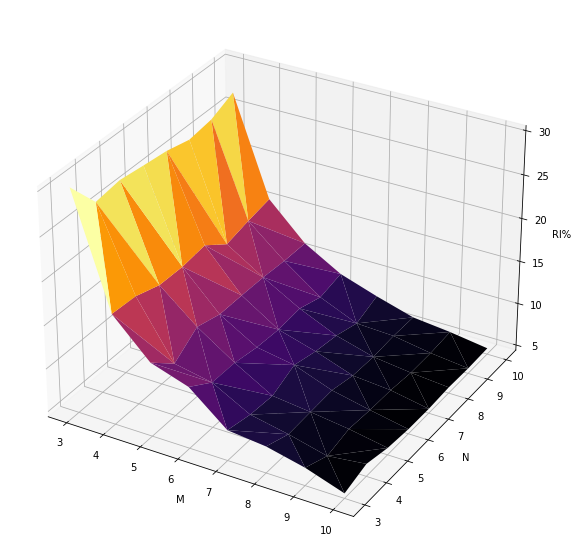

In [5]:
""" Plot """
fig = plt.figure(figsize=(15,10))
ax = plt.axes(projection='3d')
ax.plot_trisurf(df['M'], df['N'], df['RI'],cmap=plt.cm.inferno)
ax.set_xlabel('M')
ax.set_ylabel('N')
ax.set_zlabel('RI%')
plt.show()

In [6]:
RI = np.array(df['RI']).reshape([8,8])
ID = np.array(df['Loss1']).reshape([8,8])
FD = np.array(df['Loss2']).reshape([8,8])

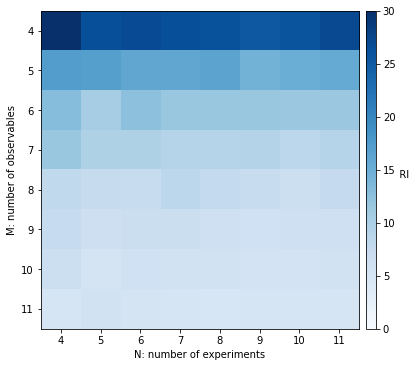

In [7]:
fig, ax = plt.subplots(1,1,figsize=(6,6))
arr = RI[:,0:9]
im = ax.imshow(arr, cmap='Blues', vmin=0, vmax=30)
ax.set_xticks(np.arange(0,arr.shape[1]))
ax.set_yticks(np.arange(0,arr.shape[0]))
ax.set_xticklabels(4+np.arange(0,arr.shape[1]))
ax.set_yticklabels(4+np.arange(0,arr.shape[0]));
ax.set_xlabel('N: number of experiments')
ax.set_ylabel('M: number of observables');

divider = make_axes_locatable(ax)
cax = divider.append_axes("right", size="3%", pad=0.1)
plt.colorbar(im, cax=cax)
cax.set_ylabel('   RI', rotation=0);

## Functions of M

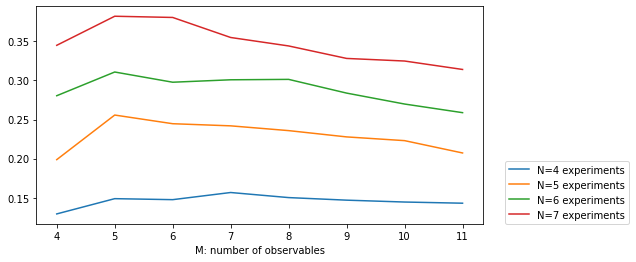

In [8]:
fig, ax = plt.subplots(1,1,figsize=(8,4))
for i in range(4):
    ax.plot(ID[:,i], label='N=%d experiments' %(i+4))
ax.legend(loc=[1.05,0])
ax.set_xlabel('M: number of observables');
ax.set_xticks(range(8));
ax.set_xticklabels(4+np.arange(8));

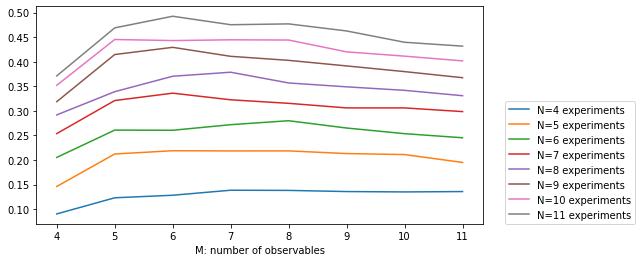

In [9]:
fig, ax = plt.subplots(1,1,figsize=(8,4))
for i in range(8):
    ax.plot(FD[:,i], label='N=%d experiments' %(i+4))
ax.legend(loc=[1.05,0])
ax.set_xlabel('M: number of observables');
ax.set_xticks(range(8));
ax.set_xticklabels(4+np.arange(8));

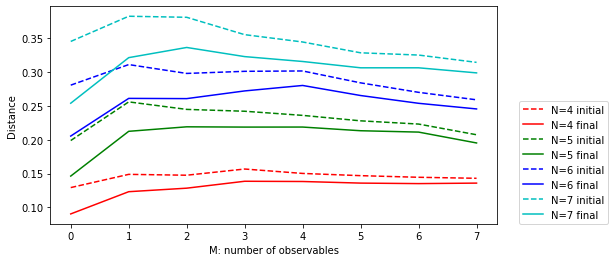

In [10]:
colors = ['r', 'g', 'b', 'c', 'm', 'y','gray','k']
fig, ax = plt.subplots(1,1,figsize=(8,4))
for i in range(4):
    ax.plot(ID[:,i], ls='--', color=colors[i], label='N=%d initial' %(i+4))
    ax.plot(FD[:,i], ls='-', color=colors[i], label='N=%d final' %(i+4))
ax.legend(loc=[1.05,0]);
ax.set_ylabel('Distance')
ax.set_xlabel('M: number of observables');

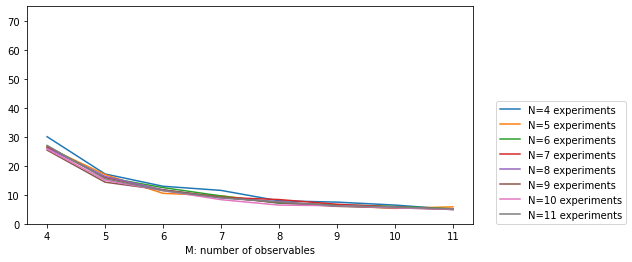

In [11]:
fig, ax = plt.subplots(1,1,figsize=(8,4))
for i in range(8):
    ax.plot(RI[:,i], label='N=%d experiments' %(i+4))
ax.legend(loc=[1.05,0])
ax.set_ylim(0,75);
ax.set_xlabel('M: number of observables');
ax.set_xticks(range(8));
ax.set_xticklabels(4+np.arange(0,8));

## Normalization - 2

In [12]:
IDN = np.array(df['Loss1'] / np.sqrt(df['M'])).reshape([8,8])
FDN = np.array(df['Loss2'] / np.sqrt(df['M'])).reshape([8,8])

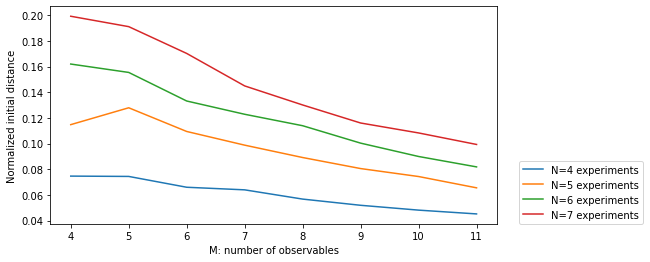

In [13]:
fig, ax = plt.subplots(1,1,figsize=(8,4))
for i in range(4):
    ax.plot(IDN[:,i], label='N=%d experiments' %(i+4))
ax.legend(loc=[1.05,0])
ax.set_xlabel('M: number of observables');
ax.set_xticks(range(8));
ax.set_xticklabels(4+np.arange(8));
#ax.set_ylim(0,0.1);
ax.set_ylabel('Normalized initial distance');

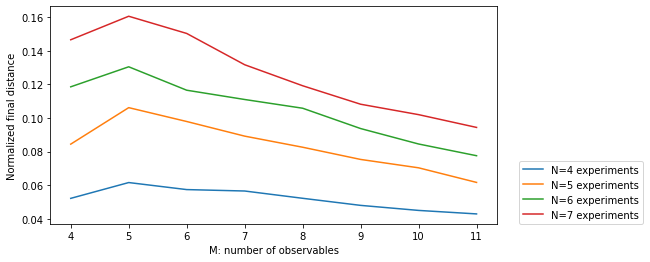

In [14]:
fig, ax = plt.subplots(1,1,figsize=(8,4))
for i in range(4):
    ax.plot(FDN[:,i], label='N=%d experiments' %(i+4))
ax.legend(loc=[1.05,0])
ax.set_xlabel('M: number of observables');
ax.set_xticks(range(8));
ax.set_xticklabels(4+np.arange(8));
#ax.set_ylim(0,0.1);
ax.set_ylabel('Normalized final distance');

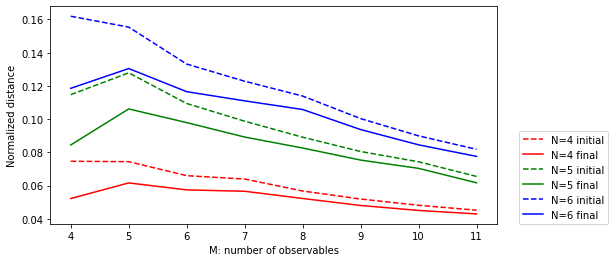

In [15]:
fig, ax = plt.subplots(1,1,figsize=(8,4))
for i in range(3):
    ax.plot(IDN[:,i], ls='--', color=colors[i], label='N=%d initial' %(i+4))
    ax.plot(FDN[:,i], ls='-', color=colors[i], label='N=%d final' %(i+4))
ax.legend(loc=[1.05,0])
ax.set_xlabel('M: number of observables');
ax.set_xticks(range(8));
ax.set_xticklabels(4+np.arange(8));
#ax.set_ylim(0.02,0.08);
ax.set_ylabel('Normalized distance');

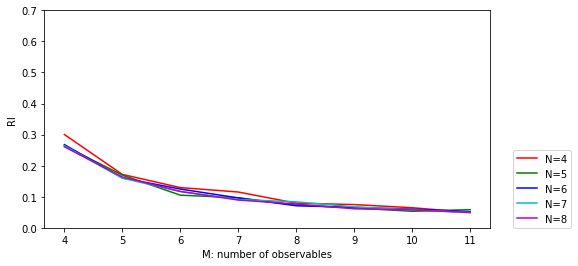

In [16]:
# Relative improvement is identical to the initial norm

fig, ax = plt.subplots(1,1,figsize=(8,4))
for i in range(5):
    ax.plot((IDN[:,i]-FDN[:,i])/IDN[:,i], ls='-', color=colors[i], label='N=%d' %(i+4))
ax.legend(loc=[1.05,0])
ax.set_xlabel('M: number of observables');
ax.set_xticks(range(8));
ax.set_xticklabels(4+np.arange(8));
ax.set_ylim(0.0,0.7);
ax.set_ylabel('RI');

## Functions of N

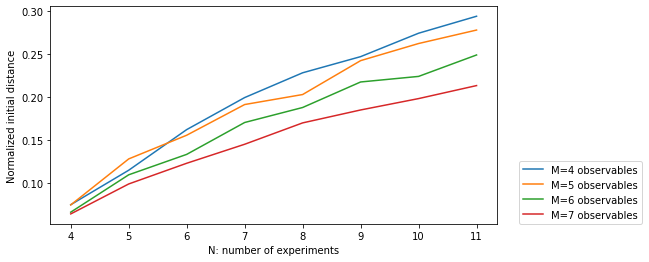

In [17]:
fig, ax = plt.subplots(1,1,figsize=(8,4))
for i in range(4):
    ax.plot(IDN[i], label='M=%d observables' %(i+4))
ax.legend(loc=[1.05,0])
ax.set_xlabel('N: number of experiments');
ax.set_xticks(range(8));
ax.set_xticklabels(4+np.arange(8));
#ax.set_ylim(0,0.1);
ax.set_ylabel('Normalized initial distance');

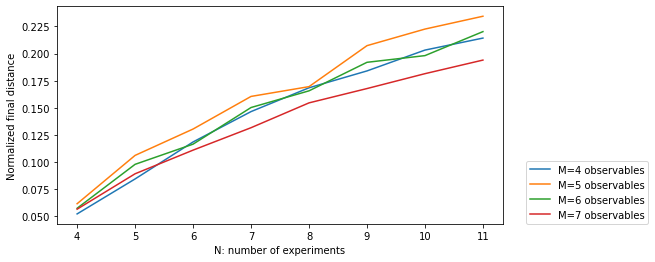

In [18]:
fig, ax = plt.subplots(1,1,figsize=(8,4))
for i in range(4):
    ax.plot(FDN[i], label='M=%d observables' %(i+4))
ax.legend(loc=[1.05,0])
ax.set_xlabel('N: number of experiments');
ax.set_xticks(range(8));
ax.set_xticklabels(4+np.arange(8));
#ax.set_ylim(0,0.1);
ax.set_ylabel('Normalized final distance');

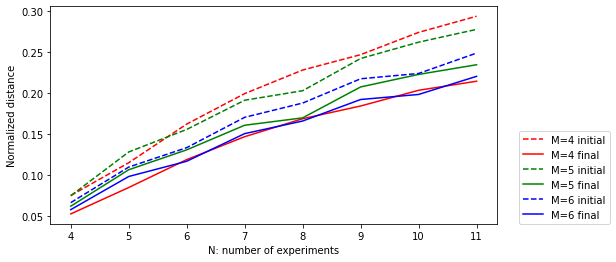

In [19]:
fig, ax = plt.subplots(1,1,figsize=(8,4))
for i in range(3):
    ax.plot(IDN[i], ls='--', color=colors[i], label='M=%d initial' %(i+4))
    ax.plot(FDN[i], ls='-', color=colors[i], label='M=%d final' %(i+4))
ax.legend(loc=[1.05,0])
ax.set_xlabel('N: number of experiments');
ax.set_xticks(range(8));
ax.set_xticklabels(4+np.arange(8));
#ax.set_ylim(0.02,0.08);
ax.set_ylabel('Normalized distance');

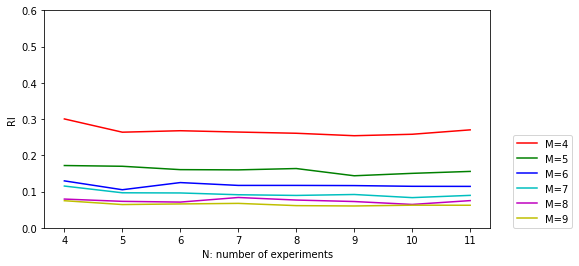

In [20]:
# Relative improvement

fig, ax = plt.subplots(1,1,figsize=(8,4))
for i in range(6):
    ax.plot((IDN[i]-FDN[i])/IDN[i], ls='-', color=colors[i], label='M=%d' %(i+4))
ax.legend(loc=[1.05,0])
ax.set_xlabel('N: number of experiments');
ax.set_xticks(range(8));
ax.set_xticklabels(4+np.arange(8));
ax.set_ylim(0.0,0.6);
ax.set_ylabel('RI');

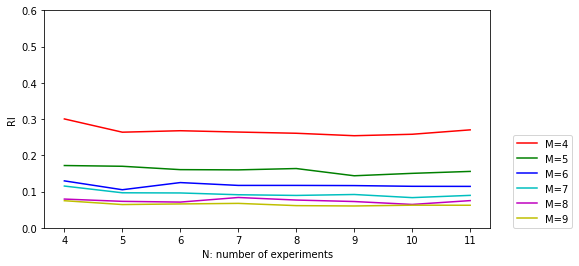

In [21]:
# The same with initial norm

fig, ax = plt.subplots(1,1,figsize=(8,4))
for i in range(6):
    ax.plot((ID[i]-FD[i])/ID[i], ls='-', color=colors[i], label='M=%d' %(i+4))
ax.legend(loc=[1.05,0])
ax.set_xlabel('N: number of experiments');
ax.set_xticks(range(8));
ax.set_xticklabels(4+np.arange(8));
ax.set_ylim(0.0,0.6);
ax.set_ylabel('RI');